<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/Labs/stat/Instructions_coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [7]:
np.random.rand?

In [8]:
np.random.rand()

0.3596992265327742

In [9]:
# get 10 coin tosses with the numpy.random.rand function, make a histogram
#np.random.seed(617) set a fixed seed: Same random numbers every time: reproducible results
np.random.rand(302) # This just generates numbers but doesn't set seed
cointainer= []  # Start with empty list: []
N=10
for i in range(N):
  cointainer.append(np.round(np.random.rand()))    # Gradually fills the list with coin toss results

print(cointainer)

...

[np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


Ellipsis

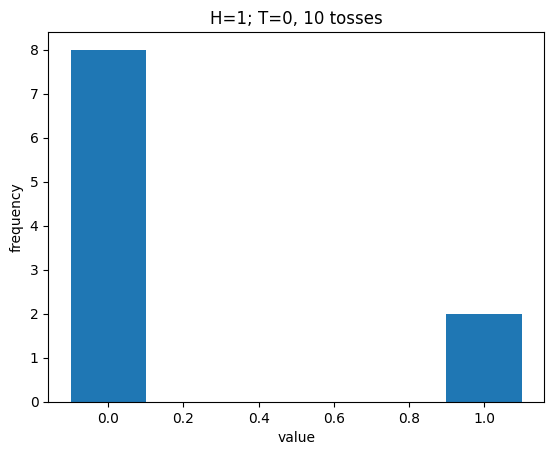

In [11]:
plt.hist(cointainer, bins=[-0.1,0.1,.9,1.1]);
plt.xlabel("value")
plt.ylabel("frequency")
plt.title(f"H=1; T=0, {N} tosses");


P(H) = prob of one head = .5


P(HH) = 0.5 * 0.5 = .25

P(HHT) = 0.5 * 0.5 * 0.5 = 0.125

P(2H & 1T) =   P(HHT) + P(HTH) + P(THH) = 3 * 0.125  = 0.375

$P(N_H; N_T) = P(H)^{N_H} * P(T)^{N_T} * {N_H + N_T \choose  N_H} $

In [15]:
from math import comb
P_2H_8T = 0.5**8 * 0.5**2 * comb(10,2)
print(f"the probability of 2H and 8T is {P_2H_8T}")

the probability of 2H and 8T is 0.0439453125


# Fair coin

The binomial distribution is the distribution that described the probability of getting outcome X $N$ times out of $M$ trials for a 2-outcome experiments with each trial with the same probability P(X).

Now show binomial distribution for 30 coin tosses of a _fair_ coin.

In [16]:
import scipy as sp

In [17]:
sp.stats.binom?

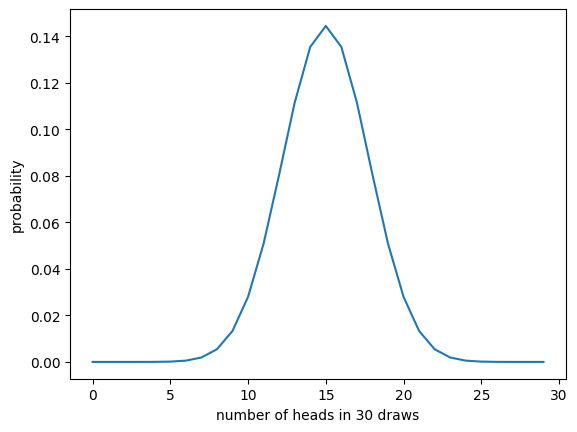

In [21]:
#Creates an array of numbers from 0 to 29
support = np.arange(0, 30) # Result: [0, 1, 2, 3, ..., 28, 29]

##P(exactly k heads in 30 tosses) = C(30, k) × (0.5)^k × (0.5)^(30-k):
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
#sp.stats.binom: The binomial distribution from SciPy
#.pmf(): Probability Mass Function (for discrete distributions)
#support: The x-values (number of heads)
#30: Number of trials (coin tosses)
#0.5: Probability of success on each trial (fair coin)
#The Semicolon ; at the end Prevents Jupyter from printing unnecessary output like <matplotlib.lines.Line2D at ...>
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# vegas coin
lets weight the coin toward tail (by 30%) and show the binomial distribution of probabilities

Probability of heads = 1/3 ≈ 0.333

Probability of tails = 2/3 ≈ 0.667

 the coin is weighted 2:1 toward tails - exactly your "30% toward tail" description!

how to represent vegas coin?


Text(0.5, 1.0, 'Vegas Coin: Biased 2:1 Toward Tails')

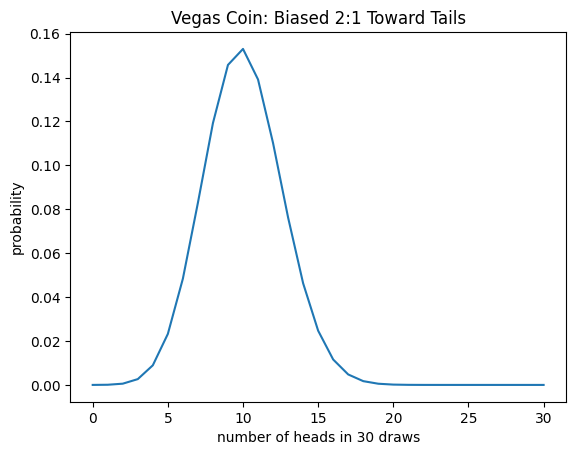

In [25]:
plt.plot(support, sp.stats.binom.pmf(support, 30, 1/3));
#P(k heads in 30 tosses) = C(30, k) × (1/3)^k × (2/3)^(30-k)
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability")
plt.title("Vegas Coin: Biased 2:1 Toward Tails")

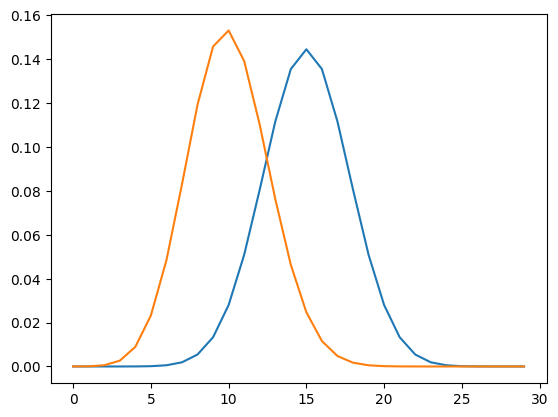

In [23]:
# Fair coin - symmetric, peak at 15 heads
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5))

# Vegas coin - skewed left, peak around 10 heads
plt.plot(support, sp.stats.binom.pmf(support, 30, 1/3))

Now get 10 draws from the same probability distributin, plot the histogram of outcomes, and compare it to the _theoretical_ binomial probability distributions

sp.stats.binom.rvs(30, 0.5, size=10): Simulates 10 experiments of 30 coin tosses each

plt.hist(): Creates a histogram of the results

density=True: Converts counts to probabilities (area under histogram = 1)

bins=np.arange(-0.05,30.05): Creates bins centered on integers (0, 1, 2, ..., 29)

.rvs gives you the "messy reality" of random experiments,

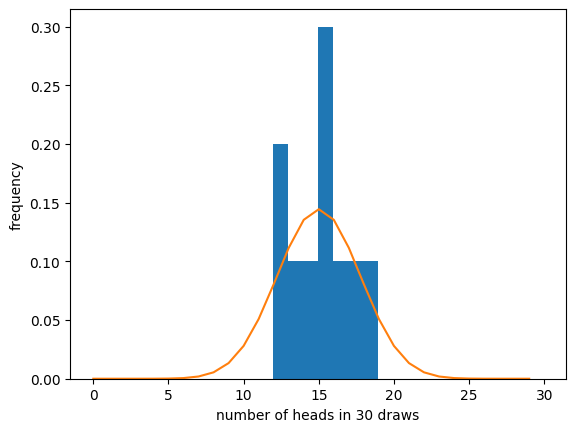

In [26]:
np.random.seed(302)
plt.hist(sp.stats.binom.rvs(30, 0.5, size=10), bins=np.arange(-0.05,30.05), density=True); #Simulates 10 experiments of 30 coin tosses each
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));  #theoretical
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

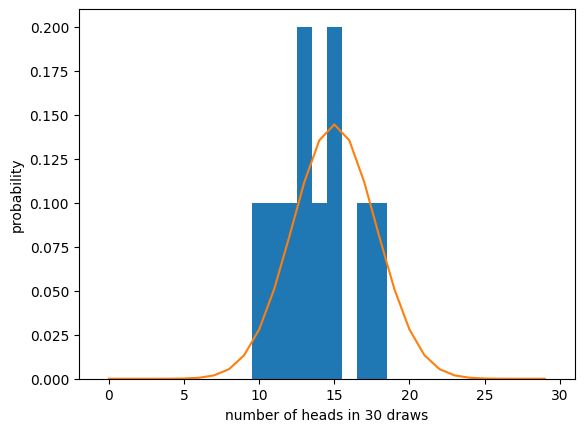

In [32]:

draws=sp.stats.binom.rvs(30, 0.5, size=10)#Simulates 10 experiments of 30 coin tosses each
plt.hist(draws, density=True, bins=np.arange(-0.5,30))
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

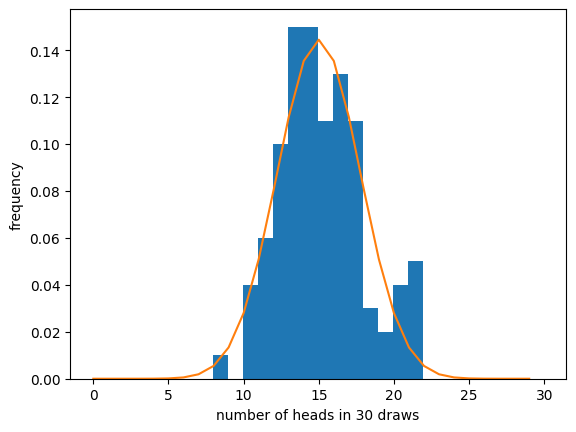

In [34]:
#Do it for a sample of 100
#np.random.seed(302)
plt.hist(sp.stats.binom.rvs(30, 0.5, size=100), bins=np.arange(-0.05,30.05), density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");


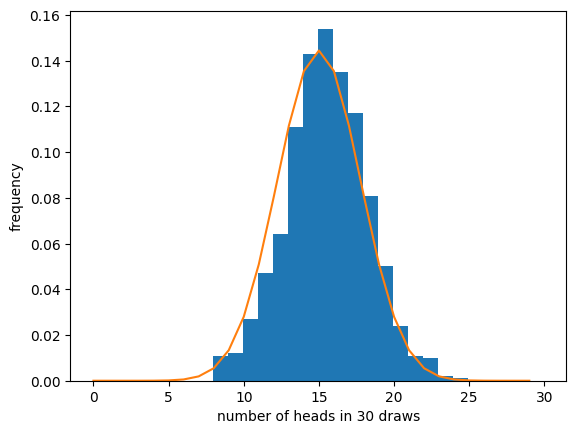

In [35]:
plt.hist(sp.stats.binom.rvs(30, 0.5, size=1_000), bins=np.arange(-0.05,30.05), density=True); #1_000  = Same as 1000
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

now do it for the vegas coin we used before

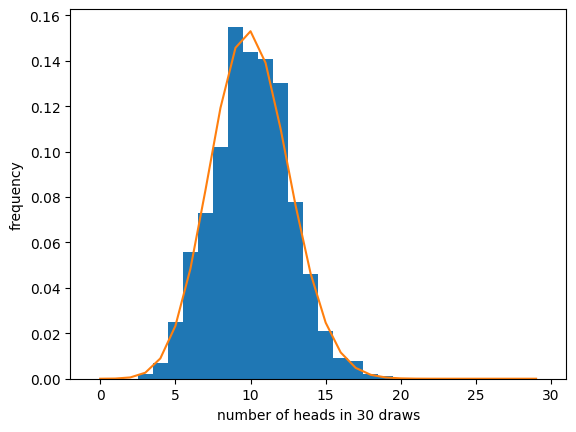

In [37]:
#vegas coin
#Do it for a sample of 1000

#Do it for a sample of 1000
plt.hist(sp.stats.binom.rvs(30, 1/3, size=1000), bins=np.arange(-0.5,30), density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 1/3));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

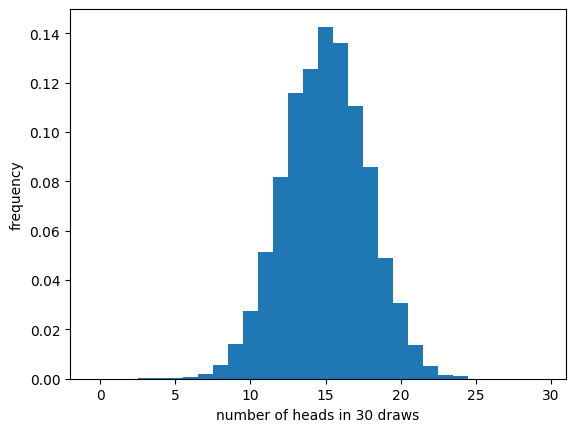

In [39]:
# we can also do it the hacky way if we dont know or want to use a package with a fundtion that is under the hood and we dont see
# manually simulates 10,000 experiments of 30 coin tosses each without using scipy.stats.binom.rvs()
cointoss = np.zeros(10_000)#Creates an array of 10,000 zeros to store results
for i in range(10_000):
  cointoss[i] = np.round(np.random.rand(30)).sum()
  #np.random.rand(30): Generates 30 random numbers between 0-1
#np.round(...): Rounds each number to 0 or 1 (coin toss simulation)
#.sum(): Counts how many 1's (heads) in the 30 tosses
#cointoss[i] = ...: Stores the result for this experiment

plt.hist(cointoss, bins=np.arange(-0.5,30), density=True);
#cointoss
plt.ylabel("frequency")
plt.xlabel("number of heads in 30 draws");


1.0


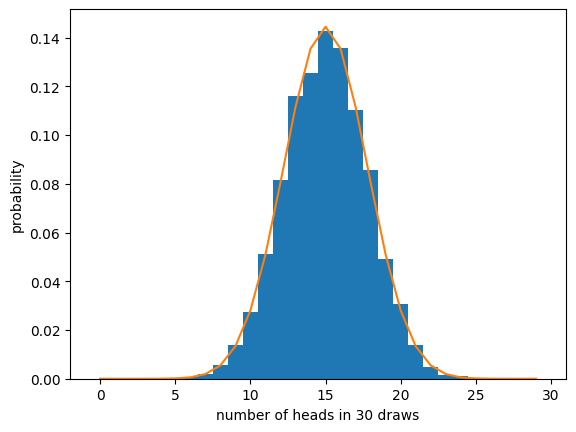

In [40]:
print(plt.hist(cointoss, bins=np.arange(-0.5,30), density=True)[0].sum())
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));

plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

**Comparison: Manual vs Built-in**

Manual ("Hacky") Way:

cointoss[i] = np.round(np.random.rand(30)).sum(),
 (You see EVERY step of the process)


Built-in Way:


sp.stats.binom.rvs(30, 0.5, size=10_000)
( Same result, but the internal mechanics are hidden)

# BAYESIAN PROBABILITY
add a prior : you are in vegas and you are sure you are going to get tricked - assume your coin has 0 probability to get heads

In [ ]:
x=np.linspace(0,1,100)
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

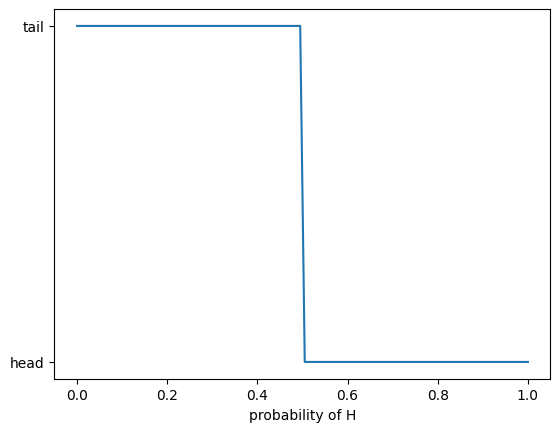

In [42]:
x = np.linspace(0.0, 1, 100)
prior = np.zeros_like(x)
prior[:50] = 1 #I believe this is an unfair coin weighted to get tail
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.yticks([0, 1], ["head", "tail"]);

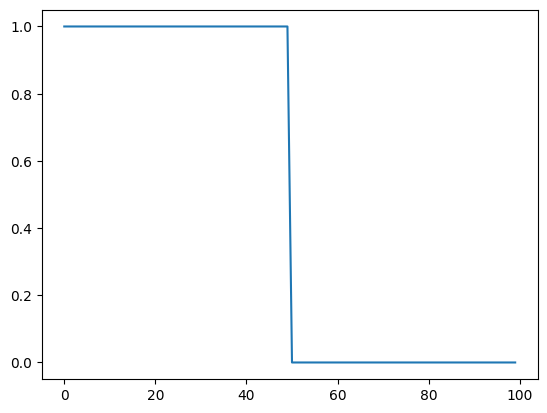

In [44]:
prior=np.zeros_like(x)
prior[:50]=1
prior
plt.plot( prior);
#plt.xlabel("probability of H")
#plt.legend();
#plt.yticks([]);

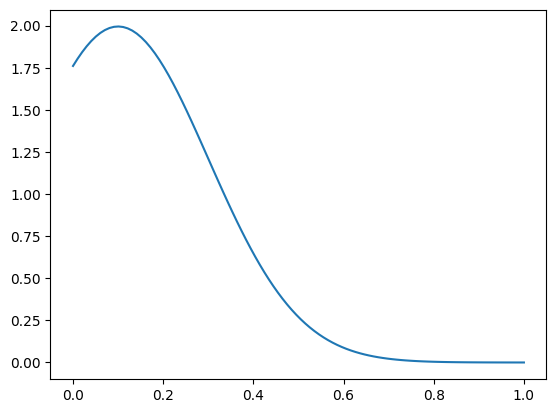

In [ ]:
prior=sp.stats.norm.pdf(x,.1,.2)

prior
plt.plot( x, prior)

In [ ]:
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
likelihood=sp.stats.binom.pmf(x*100)

In [ ]:
likelihood=sp.stats.binom.pmf(support, 30 , .5)


In [ ]:
#0 probability of getting heads=1, 100% probability of getting tails...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.yticks([0, 1], ["head", "tail"]);

In [ ]:
#BAYES THEOREM:
#Posterior = likelihood * prior / evidence ~ likelihood * priori
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
posterior = ...
plt.plot(x, posterior, label="unnormalized probability")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
#try a continuous, never 0 prior
prior = ...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);


In [ ]:
posterior = ...
plt.plot(x, posterior, label="unnormalized posterior unfair coin")
plt.plot(x, sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5) / 3.45, label="fair coin")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);